In [95]:
import pandas as pd
import re
import time
import datetime

## Loading data

In [96]:
import plots.e2e_parse_benchlog as parser
import os

# e2e_base_dir = "./../rofl_polybox_data/" # for nicolas

# e2e_base_dir = "/Users/hidde/PhD/fl/fl-ansible/experiment_results/e2e/" # for hidde
e2e_base_dir = "./data/endtoend/" # for hidde

configs = {
    # # CIFAR Large
    # os.path.join(e2e_base_dir, "1621422555/0"): {
    #     "dataset": "CIFAR Large",
    #     "type": "linf_opt",
    #     "version": "optimized",
    #     "bandwidth": 102.76
    # },
    # os.path.join(e2e_base_dir, "1621422555/1"): {
    #     "dataset": "CIFAR Large",
    #     "type": "plain",
    #     "version": "None",
    #     "bandwidth": 4.19
    # },
    #
    # os.path.join(e2e_base_dir, "cifar_small_1622893559/0"): {
    #     "dataset": "CIFAR Small",
    #     "type": "l2_opt",
    #     "version": "optimized",
    #     "bandwidth": 6.73
    # },
    # os.path.join(e2e_base_dir, "cifar_small_1622893559/1"): {
    #     "dataset": "CIFAR Small",
    #     "type": "l2",
    #     "version": "unoptimized",
    #     "bandwidth": 34.77
    # },
    # os.path.join(e2e_base_dir, "cifar_small_1622893559/2"): {
    #     "dataset": "CIFAR Small",
    #     "type": "linf_opt",
    #     "version": "optimized",
    #     "bandwidth": 23.34
    # },
    # os.path.join(e2e_base_dir, "cifar_small_1622893559/3"): {
    #     "dataset": "CIFAR Small",
    #     "type": "linf",
    #     "version": "unoptimized",
    #     "bandwidth": 23.34
    # },
    # os.path.join(e2e_base_dir, "cifar_small_1622893559/4"): {
    #     "dataset": "CIFAR Small",
    #     "type": "plain",
    #     "version": None,
    #     "bandwidth": 0.95
    # },
    #
    # # CIFAR Small L2
    # # MNIST Linf, L2
    # os.path.join(e2e_base_dir, "mnist_e2e_1622794982/0"): {
    #     "dataset": "MNIST",
    #     "type": "l2_opt",
    #     "version": "optimized",
    #     "bandwidth": 2.81
    # },
    # os.path.join(e2e_base_dir, "mnist_e2e_1622794982/1"): {
    #     "dataset": "MNIST",
    #     "type": "l2",
    #     "version": "unoptimized",
    #     "bandwidth": 10.75
    # },
    # os.path.join(e2e_base_dir, "mnist_e2e_1622794982/2"): {
    #     "dataset": "MNIST",
    #     "type": "linf_opt",
    #     "version": "optimized",
    #     "bandwidth": 7.21
    # },
    # os.path.join(e2e_base_dir, "mnist_e2e_1622794982/3"): {
    #     "dataset": "MNIST",
    #     "type": "linf",
    #     "version": "unoptimized",
    #     "bandwidth": 7.21
    # },
    # os.path.join(e2e_base_dir, "mnist_e2e_1622794982/4"): {
    #     "dataset": "MNIST",
    #     "type": "plain",
    #     "version": None,
    #     "bandwidth": 0.29
    # }
    # CIFAR Large
    os.path.join(e2e_base_dir, "cifar_large_1631562777/1"): {
        "dataset": "CIFAR Large",
        "type": "linf_opt",
        "version": "optimized",
        "bandwidth": 102.76
    },
    os.path.join(e2e_base_dir, "cifar_large_1631562777/0"): {
        "dataset": "CIFAR Large",
        "type": "plain",
        "version": "None",
        "bandwidth": 4.19
    },

    os.path.join(e2e_base_dir, "cifar_small_1631607104/0"): {
        "dataset": "CIFAR Small",
        "type": "l2_opt",
        "version": "optimized",
        "bandwidth": 6.73
    },
    os.path.join(e2e_base_dir, "cifar_small_1631607104/3"): {
        "dataset": "CIFAR Small",
        "type": "l2",
        "version": "unoptimized",
        "bandwidth": 34.77
    },
    os.path.join(e2e_base_dir, "cifar_small_1631607104/1"): {
        "dataset": "CIFAR Small",
        "type": "linf_opt",
        "version": "optimized",
        "bandwidth": 23.34
    },
    os.path.join(e2e_base_dir, "cifar_small_1631607104/4"): {
        "dataset": "CIFAR Small",
        "type": "linf",
        "version": "unoptimized",
        "bandwidth": 23.34
    },
    os.path.join(e2e_base_dir, "cifar_small_1631607104/2"): {
        "dataset": "CIFAR Small",
        "type": "plain",
        "version": None,
        "bandwidth": 0.95
    },

    # CIFAR Small L2
    # MNIST Linf, L2
    os.path.join(e2e_base_dir, "mnist_e2e_1631611383/1"): {
        "dataset": "MNIST",
        "type": "l2_opt",
        "version": "optimized",
        "bandwidth": 2.81
    },
    os.path.join(e2e_base_dir, "mnist_e2e_1631611383/2"): {
        "dataset": "MNIST",
        "type": "l2",
        "version": "unoptimized",
        "bandwidth": 10.75
    },
    os.path.join(e2e_base_dir, "mnist_e2e_1631611383/3"): {
        "dataset": "MNIST",
        "type": "linf_opt",
        "version": "optimized",
        "bandwidth": 7.21
    },
    os.path.join(e2e_base_dir, "mnist_e2e_1631611383/4"): {
        "dataset": "MNIST",
        "type": "linf",
        "version": "unoptimized",
        "bandwidth": 7.21
    },
    os.path.join(e2e_base_dir, "mnist_e2e_1631611383/0"): {
        "dataset": "MNIST",
        "type": "plain",
        "version": None,
        "bandwidth": 0.29
    }
}

,time,round,loss,acc,idf,dataset,type,version,bandwidth,rel_time
0,2021-09-13 21:11:40.658,0,4.683655,0.0938,CIFAR Large linf_opt optimized,CIFAR Large,linf_opt,optimized,102.76,NaN
1,2021-09-13 21:14:01.125,1,2.444028,0.1107,CIFAR Large linf_opt optimized,CIFAR Large,linf_opt,optimized,102.76,140.467
2,2021-09-13 21:16:07.633,2,2.162337,0.2125,CIFAR Large linf_opt optimized,CIFAR Large,linf_opt,optimized,102.76,126.508
3,2021-09-13 21:18:12.893,3,2.035525,0.2884,CIFAR Large linf_opt optimized,CIFAR Large,linf_opt,optimized,102.76,125.260
4,2021-09-13 21:20:25.937,4,1.872221,0.3493,CIFAR Large linf_opt optimized,CIFAR Large,linf_opt,optimized,102.76,133.044
...,...,...,...,...,...,...,...,...,...,...
155,2021-09-14 09:36:27.466,155,0.073074,0.9871,MNIST plain None,MNIST,plain,None,0.29,2.101
156,2021-09-14 09:36:29.558,156,0.074867,0.9864,MNIST plain None,MNIST,plain,None,0.29,2.092
157,2021-09-14 09:36:31.665,157,0.072614,0.9865,MNIST plain None,MNIST,plain,None,0.29,2.107
158,2021-09-14 09:36:33.767,158,0.073557,0.9866,MNIST plain None,MNIST,plain,None,0.29,2.102


idf
CIFAR Large linf_opt optimized    130.663239
CIFAR Large plain None             21.204623
CIFAR Small l2_opt optimized       53.172343
CIFAR Small l2 unoptimized        280.169505
CIFAR Small linf_opt optimized     37.942172
CIFAR Small linf unoptimized      251.270364
CIFAR Small plain None              1.830131
MNIST l2_opt optimized             26.269918
MNIST l2 unoptimized              131.060289
MNIST linf_opt optimized           19.761667
MNIST linf unoptimized            121.910314
MNIST plain None                    2.093346
Name: rel_time, dtype: float64

idf
CIFAR Large linf_opt optimized    260.636283
CIFAR Large plain None             21.208181
CIFAR Small l2_opt optimized      106.446677
CIFAR Small l2 unoptimized        280.209060
CIFAR Small linf_opt optimized     75.942859
CIFAR Small linf unoptimized      251.252630
CIFAR Small plain None              1.831880
MNIST l2_opt optimized             52.553000
MNIST l2 unoptimized              131.035738
MNIST linf_opt optimized           39.504774
MNIST linf unoptimized            121.876856
MNIST plain None                    2.094481
Name: verification_complete, dtype: float64

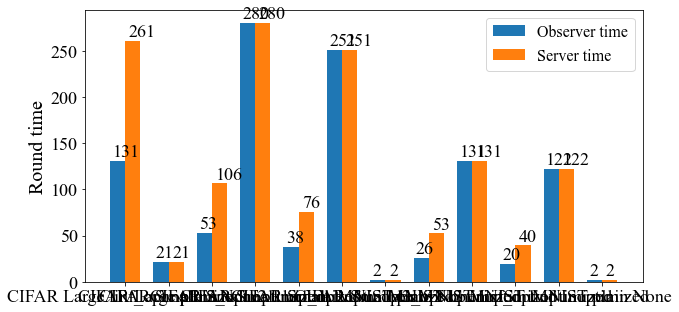

In [97]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

labels = [f"{config['dataset']} {config['type']} {config['version']}" for _, config in configs.items()]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

data_server, observer_data, client_data = pd.DataFrame(), pd.DataFrame(), pd.DataFrame()
for i, (path, config) in enumerate(configs.items()):
    s, o, clients = parser.load_benchlog(path)

    for v in [s, o, clients]:
        idf = f"{config['dataset']} {config['type']} {config['version']}"
        v["idf"] = idf
        for key in ['dataset', 'type', 'version', 'bandwidth']:
            v[key] = config[key]

    o["rel_time"] = o['time'].diff().dt.total_seconds()
    o["rel_time"] = o["rel_time"][1:]

    data_server = data_server.append(s)
    observer_data = observer_data.append(o)
    client_data = client_data.append(clients)

# display(observer_data)
pd.set_option('display.max_rows', 500)

fig, ax = plt.subplots(figsize=[10, 5])

# x = observer_data.groupby(["idf"])["time"].diff().dt.total_seconds()

# observer_data["rel_time"] = observer_data['time'].diff().dt.total_seconds()
# observer_data[observer_data["round"] == 0]["rel_time"] = None

# display(observer_data)
# display(observer_data.groupby(["idf"])["rel_time"].mean())

y1 = observer_data.groupby(["idf"], sort=False)["rel_time"].mean()
y2 = data_server.groupby(["idf"], sort=False)["verification_complete"].mean() / 1000
rects1 = ax.bar(x - width/2, y1, width, label='Observer time')
rects2 = ax.bar(x + width/2, y2, width, label='Server time')

# display(y1)
# display(y2)

ax.set_ylabel("Round time")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)
for a, (b, c) in zip(x, zip(y1, y2)):
    ax.text(a - width / 1.2, b + 5, round(b), color='black')
    ax.text(a + width / 4, c + 5, round(c), color='black')

# plt.show()
plt.savefig("plots_output/e2e_cifar_linf.png")

# data_server.to_csv("")

In [98]:
# Server benchlor

results = data_server.groupby(["dataset", "type"]).agg({'verification_complete': ['sum', 'mean', 'sem']})
results.reset_index()
results_per_dataset = results.groupby("dataset")
# print(results_per_dataset)

in_group = results['verification_complete']['mean']\
    .groupby(["dataset"])\
    .transform(lambda x: x / x[x.index.get_level_values('type') == 'plain'][0])
# results['fraction'] = results['verification_complete']['mean'] / results[results['type'] == 'plain']['verification_complete']['mean']

in_group = in_group.rename('mean_factor')

results = results.join(in_group, on=['dataset', 'type'])
results['mean_factor'] = results['mean_factor'].round(2)
display(results)

/Users/hidde/opt/anaconda3/envs/tf37/lib/python3.7/site-packages/pandas/core/reshape/merge.py:648: UserWarning: merging between different levels can give an unintended result (2 levels on the left,1 on the right)
  warnings.warn(msg, UserWarning)


(verification_complete, sum)  \
dataset     type                                     
CIFAR Large linf_opt                      41441169   
            plain                          3393309   
CIFAR Small l2                            28020906   
            l2_opt                        10538221   
            linf                          25125263   
            linf_opt                       7518343   
            plain                           183188   
MNIST       l2                            20965718   
            l2_opt                         8355927   
            linf                          19500297   
            linf_opt                       6281259   
            plain                           335117   

                      (verification_complete, mean)  \
dataset     type                                      
CIFAR Large linf_opt                  260636.283019   
            plain                      21208.181250   
CIFAR Small l2                        280209.060000   
            l2_opt                    106446.676768   
            linf                      251252.630000   
            linf_opt                   75942.858586   
            plain                       1831.880000   
MNIST       l2                        131035.737500   
            l2_opt                     52553.000000   
            linf                      121876.856250   
            linf_opt                   39504.773585   
            plain                       2094.481250   

                      (verification_complete, sem)  mean_factor  
dataset     type                                                 
CIFAR Large linf_opt                    387.689467        12.29  
            plain                        16.405183         1.00  
CIFAR Small l2                          777.535586       152.96  
            l2_opt                      321.606864        58.11  
            linf                        782.665242       137.16  
            linf_opt                    275.507924        41.46  
            plain                         6.842208         1.00  
MNIST       l2                          279.224816        62.56  
            l2_opt                       74.427940        25.09  
            linf                        231.921758        58.19  
            linf_opt                     76.199265        18.86  
            plain                         3.824727         1.00

In [99]:
observer_results = observer_data.groupby(["dataset", "type"]).agg({'rel_time': ['sum', 'mean', 'sem'], 'acc': lambda x: x.iloc[-1], 'loss': ['min'], 'bandwidth': 'mean'})
in_group = observer_results['rel_time']['mean']\
    .groupby(["dataset"])\
    .transform(lambda x: x / x[x.index.get_level_values('type') == 'plain'][0])
in_group = in_group.rename('mean_factor')
observer_results = observer_results.join(in_group, on=['dataset', 'type'])
observer_results['mean_factor'] = observer_results["mean_factor"].round(2)

in_group = observer_results[('bandwidth', 'mean')]\
    .groupby(["dataset"])\
    .transform(lambda x: x / x[x.index.get_level_values('type') == 'plain'][0])
in_group = in_group.rename('bw_factor')
observer_results = observer_results.join(in_group, on=['dataset', 'type'])
observer_results['bw_factor'] = observer_results["bw_factor"].round(0)

display(observer_results)

/Users/hidde/opt/anaconda3/envs/tf37/lib/python3.7/site-packages/pandas/core/reshape/merge.py:648: UserWarning: merging between different levels can give an unintended result (2 levels on the left,1 on the right)
  warnings.warn(msg, UserWarning)


(rel_time, sum)  (rel_time, mean)  (rel_time, sem)  \
dataset     type                                                           
CIFAR Large linf_opt        20775.455        130.663239         0.372273   
            plain            3371.535         21.204623         0.012393   
CIFAR Small l2              27736.781        280.169505         0.783669   
            l2_opt           5264.062         53.172343         0.229647   
            linf            24875.766        251.270364         0.789093   
            linf_opt         3756.275         37.942172         0.180173   
            plain             181.183          1.830131         0.004931   
MNIST       l2              20838.586        131.060289         0.279476   
            l2_opt           4176.917         26.269918         0.108175   
            linf            19383.740        121.910314         0.230659   
            linf_opt         3142.105         19.761667         0.135059   
            plain             332.842          2.093346         0.002442   

                      (acc, <lambda>)  (loss, min)  (bandwidth, mean)  \
dataset     type                                                        
CIFAR Large linf_opt           0.8478     0.596150             102.76   
            plain              0.8605     0.553629               4.19   
CIFAR Small l2                 0.6033     1.124369              34.77   
            l2_opt             0.5840     1.172460               6.73   
            linf               0.6038     1.126371              23.34   
            linf_opt           0.6045     1.123299              23.34   
            plain              0.6058     1.122183               0.95   
MNIST       l2                 0.9854     0.074744              10.75   
            l2_opt             0.9741     0.115891               2.81   
            linf               0.9873     0.073370               7.21   
            linf_opt           0.9854     0.072486               7.21   
            plain              0.9873     0.071346               0.29   

                      mean_factor  bw_factor  
dataset     type                              
CIFAR Large linf_opt         6.16       25.0  
            plain            1.00        1.0  
CIFAR Small l2             153.09       37.0  
            l2_opt          29.05        7.0  
            linf           137.30       25.0  
            linf_opt        20.73       25.0  
            plain            1.00        1.0  
MNIST       l2              62.61       37.0  
            l2_opt          12.55       10.0  
            linf            58.24       25.0  
            linf_opt         9.44       25.0  
            plain            1.00        1.0

In [100]:

# output
cols = [('acc', '<lambda>'), ('rel_time', 'mean'), ('rel_time', 'sum'), ('bandwidth', 'mean'), 'mean_factor', 'bw_factor']

output_frame = pd.DataFrame()
output_frame[['acc', 'mean_s', 'sum_s', 'bandwidth_GB', 'mean_factor', 'bw_factor']] = observer_results[cols]
output_frame['mean_factor'] = output_frame['mean_factor'].round(0).astype(np.int32)
output_frame['bw_factor'] = output_frame['bw_factor'].round(0).astype(np.int32)

# Server terminates at round id 39.
output_frame['sum_s'] = output_frame['sum_s'] + output_frame['mean_s']
                                                         str(round(x, 2)))
display(output_frame)

output_frame.to_csv("data/e2e_table.csv")

acc      mean_s         sum_s  bandwidth_GB  \
dataset     type                                                       
CIFAR Large linf_opt  0.8478  130.663239  20906.118239        102.76   
            plain     0.8605   21.204623   3392.739623          4.19   
CIFAR Small l2        0.6033  280.169505  28016.950505         34.77   
            l2_opt    0.5840   53.172343   5317.234343          6.73   
            linf      0.6038  251.270364  25127.036364         23.34   
            linf_opt  0.6045   37.942172   3794.217172         23.34   
            plain     0.6058    1.830131    183.013131          0.95   
MNIST       l2        0.9854  131.060289  20969.646289         10.75   
            l2_opt    0.9741   26.269918   4203.186918          2.81   
            linf      0.9873  121.910314  19505.650314          7.21   
            linf_opt  0.9854   19.761667   3161.866667          7.21   
            plain     0.9873    2.093346    334.935346          0.29   

                      mean_factor  bw_factor  
dataset     type                              
CIFAR Large linf_opt            6         25  
            plain               1          1  
CIFAR Small l2                153         37  
            l2_opt             29          7  
            linf              137         25  
            linf_opt           21         25  
            plain               1          1  
MNIST       l2                 63         37  
            l2_opt             13         10  
            linf               58         25  
            linf_opt            9         25  
            plain               1          1

### Accuracy plot

In [101]:
def _preprocess(df, suffix):
    # set start timestamp to 0 (1 because of x-axis log scale)
    df["rel_time"].iloc[0] = 1
    df["cumtime"] = df["rel_time"].cumsum()
    df = df.rename(columns={"accuracy": f"accuracy_{suffix}", "rel_time": f"rel_time_{suffix}", "cumtime": f"cumtime_{suffix}" })
    return df

def _select_df(df, idf):
    plot_data = pd.DataFrame()
    plot_data[['round', 'accuracy', 'rel_time']] = df[df['idf'] == idf] \
        [['round', 'acc', 'rel_time']]
    return plot_data

/Users/hidde/opt/anaconda3/envs/tf37/lib/python3.7/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


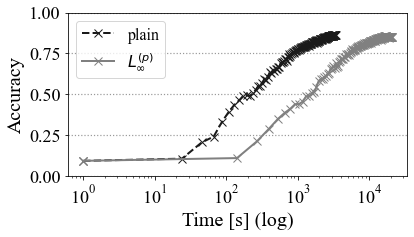

In [102]:
from plots.e2e_time import build_fig_e2e_cifar_time
from functools import reduce

df_u = _preprocess(_select_df(observer_data, "CIFAR Large plain None"), "u")
df_l8p = _preprocess(_select_df(observer_data, "CIFAR Large linf_opt optimized"), "l8p")

data_frames = [df_u, df_l8p]
df = reduce(lambda  left, right: pd.merge(left, right, on=['round'], how='outer'), data_frames)
fig_e2e_cifar_time = build_fig_e2e_cifar_time(df)
display(fig_e2e_cifar_time)

# display(df)

/Users/hidde/opt/anaconda3/envs/tf37/lib/python3.7/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


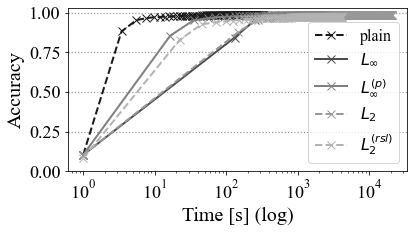

In [103]:
from plots.e2e_time import build_fig_e2e_mnist_time
from functools import reduce

df_u = _preprocess(_select_df(observer_data, "MNIST plain None"), "u")
# display(df_u)
# display(observer_data)
df_l8 = _preprocess(_select_df(observer_data, "MNIST linf unoptimized"), "l8")
df_l8p = _preprocess(_select_df(observer_data, "MNIST linf_opt optimized"), "l8p")
df_l2 = _preprocess(_select_df(observer_data, "MNIST l2 unoptimized"), "l2")
df_l2rst = _preprocess(_select_df(observer_data, "MNIST l2_opt optimized"), "l2rst")
#
data_frames = [df_u, df_l8, df_l8p, df_l2, df_l2rst]
df = reduce(lambda  left, right: pd.merge(left, right, on=['round'], how='outer'), data_frames)
fig_e2e_mnist_time = build_fig_e2e_mnist_time(df)
display(fig_e2e_mnist_time)

# display(df)

### Timing plot

Index(['CIFAR Large linf_opt optimized', 'CIFAR Large plain None',
       'CIFAR Small l2 unoptimized', 'CIFAR Small l2_opt optimized',
       'CIFAR Small linf unoptimized', 'CIFAR Small linf_opt optimized',
       'CIFAR Small plain None', 'MNIST l2 unoptimized',
       'MNIST l2_opt optimized', 'MNIST linf unoptimized',
       'MNIST linf_opt optimized', 'MNIST plain None'],
      dtype='object', name='idf')

model_download            0.056830
model_training            6.686172
model_crypto             23.367008
model_upload              3.014460
agg_done                  0.105408
param_extraction_done    66.770122
Name: MNIST linf_opt optimized, dtype: float64

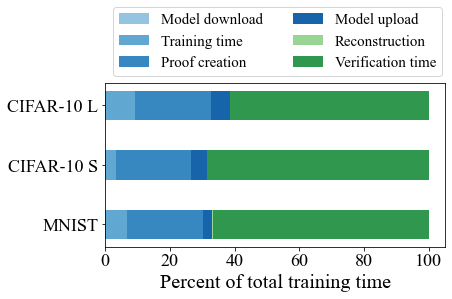

In [104]:
from matplotlib.backends.backend_pdf import PdfPages

# display(data_server)

from matplotlib import cm

records = [
    "MNIST linf_opt optimized",
    "CIFAR Small linf_opt optimized",
    "CIFAR Large linf_opt optimized",
]
metadata = {
           "CIFAR Large linf_opt optimized": { "label": "CIFAR-10 L" },
           "CIFAR Small linf_opt optimized": { "label": "CIFAR-10 S" },
           "MNIST linf_opt optimized": { "label": "MNIST" },

    }

columns_server = [
    # 'start',
                  "agg_done", "param_extraction_done"] #, "verification_complete"]
columns_client = ["model_download", "model_training",
                       "model_crypto", "model_upload"]
metadata_columns = {
    'start': "Training time",
    'agg_done': "Reconstruction",
    'param_extraction_done': 'Verification time',
    'model_download': 'Model download',
    'model_training': 'Training time',
    'model_crypto': 'Proof creation',
    'model_upload': 'Model upload'
}

client_colors = [cm.get_cmap("Blues")(col) for col in np.linspace(0.4, 0.8, len(columns_client))]
server_colors = [cm.get_cmap("Greens")(col) for col in np.linspace(0.4, 0.7, len(columns_server))]
bar_colors = client_colors + server_colors

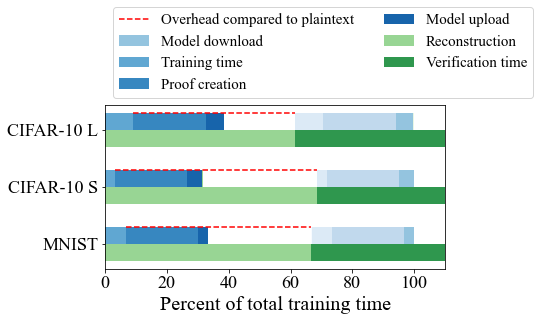

In [105]:
client_colors = [cm.get_cmap("Blues")(col) for col in np.linspace(0.0, 0.4, len(columns_client))]
server_colors = [cm.get_cmap("Greens")(col) for col in np.linspace(0.1, 0.4, len(columns_server))]
bar_colors_non_current = client_colors + server_colors


df1: 

df1_scaled: 


,training,createproof,verifyproof
idf,,,
MNIST linf_opt optimized,2729,10719.660377,27022.930818
CIFAR Small linf_opt optimized,2458,21716.656566,52556.949495
CIFAR Large linf_opt optimized,23572,75910.591195,158173.421384


idf
MNIST linf_opt optimized         -0.332299
CIFAR Small linf_opt optimized   -0.315055
CIFAR Large linf_opt optimized   -0.386106
dtype: float64

,training,createproof,verifyproof
idf,,,
MNIST linf_opt optimized,3.366277,13.222919,33.333333
CIFAR Small linf_opt optimized,1.558944,13.773413,33.333333
CIFAR Large linf_opt optimized,4.967543,15.997334,33.333333


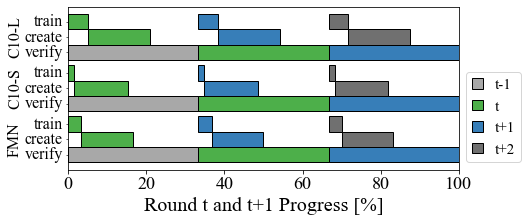

In [110]:
# transform data into df1 (which contains the required format)

df1 = data_df_client.loc[records]
df1_server = data_df_server.loc[records]

# combine model download and training into training time (i.e., what it would be on plaintext)
df1["training"] = df1["model_download"] + df1["model_training"]

# sum creating proofs (well formedness + range proof), model upload time + discrete log solve time
df1["createproof"] = df1["model_crypto"] + df1["model_upload"] + df1_server["agg_done"]

# overhead for verifying proofs
df1["verifyproof"] = df1_server["param_extraction_done"]

df1 = df1[["training", "createproof", "verifyproof"]]

print(f"df1: ")
display(df1)

total_sum = (df1["verifyproof"] - df1.sum(axis=1)) / df1.sum(axis=1)
display(total_sum)

# scale the numbers such that 3* verify == 100%
df1_scaled = pd.DataFrame()

print(f"\ndf1_scaled: ")
# scale each column such that 3*verifyproof column is 100%
for col in df1.columns.values: 
    df1_scaled[col] = df1[col] * 100 / df1["verifyproof"] / 3
display(df1_scaled)


# mark for which phase (create, train, verify) we have data from a particular round
verifyproof_rounds = ["t-1", "t", "t+1"]
createproof_rounds = ["t", "t+1", "t+2"]
training_rounds = ["t", "t+1", "t+2"]



with PdfPages(f"plots_output/e2e_operation_times_optimistic_cont_nku.pdf") as pdf:
    fig, ax = plt.subplots(figsize=(7,3))
    y_pos = np.arange(len(records))

    bar_height = 0.3

    from common import get_colorful_styles

    colors, linestyles = get_colorful_styles()

    color_d = {
        "t-1": (0.66, 0.66, 0.66, 1),
        "t": colors[2],
        "t+1": colors[1],
        "t+2": (0.44, 0.44, 0.44, 1),
    }


    bars = []

    for i, round_lbl in enumerate(["t-1", "t", "t+1", "t+2"]):
    
        if round_lbl in verifyproof_rounds:
            # add the horizontal bars for verify (3rd lines)
            rects = ax.barh(y_pos - bar_height, left=i * df1_scaled["verifyproof"], width=df1_scaled["verifyproof"], height=bar_height, color=color_d[round_lbl], label=f"{round_lbl}", edgecolor="black")
    
            if round_lbl == "t":
                bars += [(bar, "verify") for bar in rects]
            
    
        if round_lbl in training_rounds:
            # add the horizontal bars for train model (1st lines)
            label = f"{round_lbl}" if round_lbl not in verifyproof_rounds else None
            left = (i-1) * df1_scaled["verifyproof"]
            rects = ax.barh(y_pos + bar_height, left=left, width=df1_scaled["training"], height=bar_height, color=color_d[round_lbl], label=label, edgecolor="black")
        
            if round_lbl == "t":
                bars += [(bar, "train") for bar in rects]
    
        if round_lbl in createproof_rounds:
            # add the horizontal bars for create proofs (2nd lines)
            left = (i-1) * df1_scaled["verifyproof"] + df1_scaled["training"]
            rects = ax.barh(y_pos, left=left, width=df1_scaled["createproof"], height=bar_height, color=color_d[round_lbl], label=None, edgecolor="black")
        
            if round_lbl == "t":
                bars += [(bar, "create") for bar in rects]

            
    # set minor tick labels: which phase it is (train, create, verify)
    ax.set_yticks([bar.get_y() + bar.get_height() / 2 + 0.0001 for bar, _ in bars], minor=True)        
    ax.set_yticklabels([label for _, label in bars], minor=True, va="center")
    for tick in ax.yaxis.get_minor_ticks():
        tick.label.set_fontsize(16)

    # set major tick labels: which model is used
    major_label_d = {
        "CIFAR Large linf_opt optimized": "C10-L",
        "CIFAR Small linf_opt optimized": "C10-S",
        "MNIST linf_opt optimized": "FMN",
    }

    # the pad controls the distance between modeles (e.g., C10-L) and phase names (e.g., train)
    ax.tick_params(axis='y', which='major', pad=45, size=0)
    ax.set_yticks(y_pos)
    ax.set_yticklabels([major_label_d[key]for key in records], rotation = 90, va="center")
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(16) 

    ax.set_xlabel("Round t and t+1 Progress [%]")
    ax.set_xlim(0, 100)

    #ax.legend(ncol=4, bbox_to_anchor=(-0.48, 1), loc='lower left', fontsize='small')
    
    ax.legend(ncol=1, bbox_to_anchor=(1, 0), loc='lower left', fontsize='small',  handlelength=0.7)
    
    pdf.savefig(bbox_inches='tight', pad_inches=0)
    plt.show()

### Other statistics
Mobilenet

In [ ]:
runs = {
    "plain": "0",
    "linf": "1"
}

for run, dir in runs.items():
    path = f"./data/endtoend/cifar_mobilenet_e2e_1631699201/{dir}"
    s, o, clients = parser.load_benchlog(path)

    o["rel_time"] = o['time'].diff().dt.total_seconds()
    o["rel_time"] = o["rel_time"][1:]

    mean = o["rel_time"].iloc[:].mean()
    print(f"{run}: {mean}")
    display(o.iloc[3:])
    display()